# Análisis de la subocupación en Argentina 1er trimestre 2021
**Por Violeta Carrera Pereyra** 


## Objetivo
Ponerse tres preguntas
- ZONAS GEOGRAFICAS
- SEXO/NIVEL EDUCATIVO
- TEMPORAL? (´COMO CAMBIO CON PANDEMIA) -- NEC JUNTAR DATASETS PRE PANDEMIA (2017-2021) son 15 datasets en total DUDAS 

## Tabla de contenidos
1. Carga de datos
2. Exploración de datos
3. Limpieza de datos
4. Presentación de datos
5. Conclusiones
6. Referencias





# 1. Carga de datos
Carga de la base (Encuesta Permanente de Hogares del INDEC primer trimestre del 2021) y recorte de las columnas con las que se trabajará.



In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style
import seaborn as sns


In [2]:
style.use('seaborn-whitegrid')

In [ ]:
#Importar datos
import os 
print(os.getcwd())

In [3]:
eph_completa = pd.read_excel("data/usu_individual_T121.xlsx")
eph_completa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46693 entries, 0 to 46692
Columns: 177 entries, CODUSU to PONDIH
dtypes: float64(115), int64(59), object(3)
memory usage: 63.1+ MB


In [ ]:
print(list(eph_completa.columns))


In [4]:
#Recorte de la base
eph = eph_completa[["CODUSU", "REGION", "AGLOMERADO", "CH04", "CH06", "NIVEL_ED", "CAT_OCUP", "PP03C", "INTENSI", "PP07A", "P47T", "DECINDR", "ITF", "DECIFR", "PP07H", "ESTADO"]]

# 2. Exploración de datos


In [5]:
eph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46693 entries, 0 to 46692
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODUSU      46693 non-null  object 
 1   REGION      46693 non-null  int64  
 2   AGLOMERADO  46693 non-null  int64  
 3   CH04        46693 non-null  int64  
 4   CH06        46693 non-null  int64  
 5   NIVEL_ED    46693 non-null  int64  
 6   CAT_OCUP    46693 non-null  int64  
 7   PP03C       19014 non-null  float64
 8   INTENSI     19014 non-null  float64
 9   PP07A       19014 non-null  float64
 10  P47T        46619 non-null  float64
 11  DECINDR     46693 non-null  int64  
 12  ITF         46691 non-null  float64
 13  DECIFR      46691 non-null  float64
 14  PP07H       19014 non-null  float64
 15  ESTADO      46693 non-null  int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 5.7+ MB


In [6]:
eph.sample(5)

,CODUSU,REGION,AGLOMERADO,CH04,CH06,NIVEL_ED,CAT_OCUP,PP03C,INTENSI,PP07A,P47T,DECINDR,ITF,DECIFR,PP07H,ESTADO
39146,TQRMNOQVWHKMLTCDEIJAH00659210,1,33,2,61,6,0,NaN,NaN,NaN,0.0,0,0.0,12.0,NaN,3
25866,TQRMNOSWUHKMKRCDEHIBB00654629,40,22,1,53,4,3,0.0,4.0,6.0,50000.0,8,80000.0,7.0,1.0,1
37443,TQRMNORWWHLNLLCDEIIAD00650538,1,32,2,69,6,0,NaN,NaN,NaN,-9.0,12,0.0,12.0,NaN,3
3108,TQRMNOQWVHJOLOCDEFKID00700318,43,4,1,7,1,0,NaN,NaN,NaN,0.0,0,79000.0,7.0,NaN,4
17813,TQRMNOQPRHMLKNCDEGLDF00699202,41,15,1,49,6,3,1.0,2.0,6.0,65000.0,9,105000.0,8.0,1.0,1


In [7]:
eph.shape

(46693, 16)

In [8]:
#Valores únicos y frecuencia relativa de cada columna del dataset (aplicado solo a variables categóricas y edad)
#Región geográfica
print(eph.REGION.unique())
eph.REGION.value_counts(dropna=False, normalize=True)

[43 41 44 42 40  1]


43    0.307412
40    0.240914
44    0.139892
42    0.117084
41    0.107275
1     0.087422
Name: REGION, dtype: float64

In [9]:
#Aglomerado urbano
print(eph.AGLOMERADO.unique())
eph.AGLOMERADO.value_counts(dropna=False, normalize=True)

[ 2  3  4  5  6  7  8  9 10 12 13 14 15 17 18 19 20 22 23 25 26 27 29 30
 31 32 33 34 36 38 91 93]


33    0.066070
23    0.054890
10    0.050179
29    0.043583
4     0.039321
19    0.038807
27    0.038357
18    0.036858
14    0.035980
13    0.035701
25    0.034288
5     0.032553
22    0.032489
38    0.032146
15    0.031739
6     0.029276
26    0.028548
7     0.028141
12    0.026813
91    0.026685
2     0.026385
17    0.023986
9     0.023580
93    0.023451
3     0.022916
36    0.021952
32    0.021352
20    0.021245
31    0.020945
8     0.020581
34    0.020239
30    0.010944
Name: AGLOMERADO, dtype: float64

In [10]:
#Sexo
print(eph.CH04.unique())
eph.CH04.value_counts(dropna=False, normalize=True)

[2 1]


2    0.522005
1    0.477995
Name: CH04, dtype: float64

In [11]:
#Edad
print(eph.CH06.unique())
eph.CH06.value_counts(dropna=False, normalize=True)

[ 27  26  38  33  15  17  10  25  21  49  37  62  34  28  60  69  70  74
  44  54  50  19  68  67  58  61  75  56  59  42  40  16  14  64  30  32
  55  24  22  18  11   7  43  47   9  35   6  63  45  57  46   4  53  20
  36  41  51  52  91  72   8  29  31  77  66  23  80  81  48   5  12   3
   2  13  84  82  71  65  76  73  78  79  -1   1  85  39  89  90  83  97
  92  87  88  86  98  93  94  99  96  95 101]


20     0.017454
16     0.016705
21     0.016683
17     0.016448
23     0.016448
         ...   
95     0.000150
97     0.000128
98     0.000107
99     0.000107
101    0.000021
Name: CH06, Length: 101, dtype: float64

In [12]:
#Nivel educativo
print(eph.NIVEL_ED.unique())
eph.NIVEL_ED.value_counts(dropna=False, normalize=True)

[6 5 3 1 2 4 7]


3    0.209582
4    0.198252
1    0.142291
6    0.129848
2    0.123487
5    0.120703
7    0.075836
Name: NIVEL_ED, dtype: float64

In [13]:
#Categoría ocupacional
print(eph.CAT_OCUP.unique())
eph.CAT_OCUP.value_counts(dropna=False, normalize=True)

[3 0 2 1 4 9]


0    0.563703
3    0.314287
2    0.103806
1    0.015141
4    0.003020
9    0.000043
Name: CAT_OCUP, dtype: float64

In [14]:
#Cantidad de empleos
print(eph.PP03C.unique())
eph.PP03C.value_counts(dropna=False, normalize=True)

[ 1. nan  2.  0.]


NaN    0.592787
1.0    0.338680
0.0    0.039985
2.0    0.028548
Name: PP03C, dtype: float64

In [15]:
#Estado de ocupación
print(eph.ESTADO.unique())
eph.ESTADO.value_counts(dropna=False)

[1 3 2 4 0]


3    19684
1    19014
4     6155
2     1766
0       74
Name: ESTADO, dtype: int64

In [60]:
def no_ocupados(estado):
    if estado == 1:
        return "Ocupado"
    else:
        return "No ocupado"
        
eph['COLUMNA'] = eph.apply(lambda x: no_ocupados(x['ESTADO']),axis=1)

<ipython-input-60-45ef86e5c775>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eph['COLUMNA'] = eph.apply(lambda x: no_ocupados(x['ESTADO']),axis=1)


In [ ]:
#Itensidad de la ocupación
print(eph.INTENSI.unique())
eph.INTENSI.value_counts(dropna=False, normalize=True)

In [ ]:
intensi = eph.INTENSI.value_counts(dropna=False)
print(intensi)


In [ ]:
plot = intensi.plot.bar(x='label', y='values',figsize=(5,5), color = ["olive"])

plt.show()

In [ ]:
estad_plt = estado.plot.bar(x='label', y='values',figsize=(5,5), color= ["lightblue"]);
estad_plt.set_xticks(1.2)

In [ ]:
estado = eph.ESTADO.value_counts(dropna=False)
estado_plot = estado.plot.bar(x='label', y='values',figsize=(5,5), color= ["olive"])
intensi_plot = intensi.plot.bar(x='label', y='values',figsize=(5,5), color = ["olive"])

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Coincidencia de cantidad de NaN con personas no ocupadas')
ax1.bar(intensi_plot, color = "olive")
ax2.bar(estado_plot, color = "olive");

In [ ]:
#Hace cuánto trabajan en la ocupación principal
print(eph.PP07A.unique())
eph.PP07A.value_counts(dropna=False, normalize=True)

In [ ]:
#Deciles de ingreso total
print(eph.DECINDR.unique())
eph.DECINDR.value_counts(dropna=False, normalize=True)

In [ ]:
#Deciles de ingreso familiar
print(eph.DECIFR.unique())
eph.DECIFR.value_counts(dropna=False, normalize=True)

In [ ]:
#Descuento por jubilación
print(eph.PP07H.unique())
eph.PP07H.value_counts(dropna=False, normalize=True)

In [ ]:
#Resúmenes estadísticos de variables de razón 
#CH06 = AÑOS
eph.CH06.describe()

In [ ]:
#P47T = monto del ingreso total
eph.P47T.describe()

In [ ]:
#ITF= monto del ingreso familiar
eph.ITF.describe()

De la lectura de los outputs correspondientes a esta sección se desprende una constatación central: la presencia de la misma cantidad de datos nulos (27679) en 5 columnas (PP03C, INTENSI, PP04D, PP07A y PP07H). Luego de realizar el value_counts de la columna del dataset ESTADO esta particularidad de la base cobra sentido: los datos no nulos de las 5 columnas corresponden a los ocupados (o valor 1 de la columna ESTADO). Es decir, son todas preguntas que solamente se le hicieron a las personas ocupadas. Como en la proxima sección se filtraran solamente los casos de los ocupados estos valores nulos no resultan un problema.
Sí parece haber habido un error en la carga de datos en la variable edad. Al ver el mínimo de la columna y sus valores únicos aparece el -1 como un valor dispuesto. Habrá que solucionar este problema en la limpieza de datos. 
Cabe mencionar, también, el valor mínimo de P47T (monto total de ingresos indivudales). El -9 y el 9, 99 y 999 en el resto de las variables se corresponde con el "No sabe/no contesta". Algo similar sucede con el 12 y 13 que aparecen como valores únicos en DECIFR y DECINDR (variables que versan sobre los deciles de ingresos), implican que no se respondio a la pregunta o que no se hizo la entrevista individual, respectivamente.
Después no encuentro anomalías: todos los valores que adquieren las variables estan contemplados en el manual de la EPH y en la próxima sección  se procederá a etiquetarlos para que los datos puedan cobrar cierto sentido. 

# 3. Limpieza de datos 
Se realizará primero un recorte de la base y se etiquetaran los valores y las variables. Una vez recortada no deberían quedar valores nulos (por la correspondencia de estos con las personas no ocupadas). A su vez, se procederá a eliminar el caso con edad = -1 y a guardar la base limpia.


In [21]:
#Renombre de columnas
renombrada = eph.rename(columns = {'CH04': 'SEXO', 'CH06': 'AÑOS', "NIVEL_ED": "NIVEL_EDUCATIVO", "CAT_OCUP": "CATEGORÍA_OCUPACIONAL", "PP03C": "CANTIDAD_DE_TRABAJOS", "PP07A": "ANTIGUEDAD_EN_OCUPACIÓN", "P47T": "MONTO_DE_INGRESO_TOTAL", "DECINDR": "DECIL_DE_INGRESOS", "ITF": "INGRESO_TOTAL_FAMILIAR", "DECIFR": "DECILES_SEGÚN_INGRESO_FAMILIAR", "PP07H": "DESCUENTO_POR_JUBILACIÓN", "INTENSI": "INTENSIDAD_DE_LA_OCUPACIÓN", "ESTADO": "ESTADO_DE_OCUPACIÓN"}, inplace = False)


In [22]:
renombrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46693 entries, 0 to 46692
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CODUSU                          46693 non-null  object 
 1   REGION                          46693 non-null  int64  
 2   AGLOMERADO                      46693 non-null  int64  
 3   SEXO                            46693 non-null  int64  
 4   AÑOS                            46693 non-null  int64  
 5   NIVEL_EDUCATIVO                 46693 non-null  int64  
 6   CATEGORÍA_OCUPACIONAL           46693 non-null  int64  
 7   CANTIDAD_DE_TRABAJOS            19014 non-null  float64
 8   INTENSIDAD_DE_LA_OCUPACIÓN      19014 non-null  float64
 9   ANTIGUEDAD_EN_OCUPACIÓN         19014 non-null  float64
 10  MONTO_DE_INGRESO_TOTAL          46619 non-null  float64
 11  DECIL_DE_INGRESOS               46693 non-null  int64  
 12  INGRESO_TOTAL_FAMILIAR          

In [23]:
#Renombre de valores 
renombrada.loc[renombrada.REGION == 1, "REGION"] = "Gran Buenos Aires"
renombrada.loc[renombrada.REGION == 40, "REGION"] = "NOA"
renombrada.loc[renombrada.REGION == 41, "REGION"] = "NEA"
renombrada.loc[renombrada.REGION == 42, "REGION"] = "Cuyo"
renombrada.loc[renombrada.REGION == 43, "REGION"] = "Pampeana"
renombrada.loc[renombrada.REGION == 44, "REGION"] = "Patagonia"
renombrada.loc[renombrada.SEXO == 1, "SEXO"] = "Varón"
renombrada.loc[renombrada.SEXO == 2, "SEXO"] = "Mujer"
renombrada.loc[renombrada.NIVEL_EDUCATIVO == 1, "NIVEL_EDUCATIVO"] = "Primario incompleto"
renombrada.loc[renombrada.NIVEL_EDUCATIVO == 2, "NIVEL_EDUCATIVO"] = "Primario completo"
renombrada.loc[renombrada.NIVEL_EDUCATIVO == 3, "NIVEL_EDUCATIVO"] = "Secundario incompleto"
renombrada.loc[renombrada.NIVEL_EDUCATIVO == 4, "NIVEL_EDUCATIVO"] = "Secundario completo"
renombrada.loc[renombrada.NIVEL_EDUCATIVO == 5, "NIVEL_EDUCATIVO"] = "Superior universitario incompleto"
renombrada.loc[renombrada.NIVEL_EDUCATIVO == 6, "NIVEL_EDUCATIVO"] = "Superior universitario completo"
renombrada.loc[renombrada.NIVEL_EDUCATIVO == 7, "NIVEL_EDUCATIVO"] = "Sin instrucción"
renombrada.loc[renombrada.NIVEL_EDUCATIVO == 9, "NIVEL_EDUCATIVO"] = "Ns/Nc"
renombrada.loc[renombrada.CATEGORÍA_OCUPACIONAL == 0, "CATEGORÍA_OCUPACIONAL"] = "No le corresponde la secuencia analizada"
renombrada.loc[renombrada.CATEGORÍA_OCUPACIONAL == 1, "CATEGORÍA_OCUPACIONAL"] = "Patrón"
renombrada.loc[renombrada.CATEGORÍA_OCUPACIONAL == 2, "CATEGORÍA_OCUPACIONAL"] = "Cuenta propia"
renombrada.loc[renombrada.CATEGORÍA_OCUPACIONAL == 3, "CATEGORÍA_OCUPACIONAL"] = "Obrero o empleado"
renombrada.loc[renombrada.CATEGORÍA_OCUPACIONAL == 4, "CATEGORÍA_OCUPACIONAL"] = "Trabajador familiar sin remuneración"
renombrada.loc[renombrada.CATEGORÍA_OCUPACIONAL == 9, "CATEGORÍA_OCUPACIONAL"] = "Ns/Nc"
renombrada.loc[renombrada.CANTIDAD_DE_TRABAJOS == 1, "CANTIDAD_DE_TRABAJOS"] = "Un solo empleo o actividad"
renombrada.loc[renombrada.CANTIDAD_DE_TRABAJOS == 2, "CANTIDAD_DE_TRABAJOS"] = "Más de un empleo o actividad"
renombrada.loc[renombrada.CANTIDAD_DE_TRABAJOS == 0, "CANTIDAD_DE_TRABAJOS"] = "No le corresponde la secuencia analizada"
renombrada.loc[renombrada.INTENSIDAD_DE_LA_OCUPACIÓN == 1, "INTENSIDAD_DE_LA_OCUPACIÓN"] = "Subocupado"
renombrada.loc[renombrada.INTENSIDAD_DE_LA_OCUPACIÓN == 2, "INTENSIDAD_DE_LA_OCUPACIÓN"] = "Ocupado pleno"
renombrada.loc[renombrada.INTENSIDAD_DE_LA_OCUPACIÓN == 3, "INTENSIDAD_DE_LA_OCUPACIÓN"] = "Sobreocupado"
renombrada.loc[renombrada.INTENSIDAD_DE_LA_OCUPACIÓN == 4, "INTENSIDAD_DE_LA_OCUPACIÓN"] = "Ocupado que no trabajó en la semana"
renombrada.loc[renombrada.INTENSIDAD_DE_LA_OCUPACIÓN == 9, "INTENSIDAD_DE_LA_OCUPACIÓN"] = "Ns/Nc"
renombrada.loc[renombrada.ANTIGUEDAD_EN_OCUPACIÓN == 1, "ANTIGUEDAD_EN_OCUPACIÓN"] = "No le corresponde la secuencia analizada"
renombrada.loc[renombrada.ANTIGUEDAD_EN_OCUPACIÓN == 1, "ANTIGUEDAD_EN_OCUPACIÓN"] = "Menos de un mes"
renombrada.loc[renombrada.ANTIGUEDAD_EN_OCUPACIÓN == 2, "ANTIGUEDAD_EN_OCUPACIÓN"] = "1 a 3 meses"
renombrada.loc[renombrada.ANTIGUEDAD_EN_OCUPACIÓN == 3, "ANTIGUEDAD_EN_OCUPACIÓN"] = "más de 3 meses a 6 meses"
renombrada.loc[renombrada.ANTIGUEDAD_EN_OCUPACIÓN == 4, "ANTIGUEDAD_EN_OCUPACIÓN"] = "más de 6 a 12 meses"
renombrada.loc[renombrada.ANTIGUEDAD_EN_OCUPACIÓN == 5, "ANTIGUEDAD_EN_OCUPACIÓN"] = "más de 1 a 5 años"
renombrada.loc[renombrada.ANTIGUEDAD_EN_OCUPACIÓN == 6, "ANTIGUEDAD_EN_OCUPACIÓN"] = "más de 5 años"
renombrada.loc[renombrada.ANTIGUEDAD_EN_OCUPACIÓN == 9, "ANTIGUEDAD_EN_OCUPACIÓN"] = "Ns/Nc"
renombrada.loc[renombrada.DECIL_DE_INGRESOS == 12, "DECIL_DE_INGRESOS"] = "No hay respuesta de ingresos"
renombrada.loc[renombrada.DECIL_DE_INGRESOS == 13, "DECIL_DE_INGRESOS"] = "Entrevista individual no analizada"
renombrada.loc[renombrada.DECILES_SEGÚN_INGRESO_FAMILIAR == 12, "DECILES_SEGÚN_INGRESO_FAMILIAR"] = "No hay respuesta de ingresos"
renombrada.loc[renombrada.DECILES_SEGÚN_INGRESO_FAMILIAR == 13, "DECILES_SEGÚN_INGRESO_FAMILIAR"] = "Entrevista individual no realizada"
renombrada.loc[renombrada.DESCUENTO_POR_JUBILACIÓN == 1,"DESCUENTO_POR_JUBILACIÓN"] = "Sí"
renombrada.loc[renombrada.DESCUENTO_POR_JUBILACIÓN == 2,"DESCUENTO_POR_JUBILACIÓN"] = "No"
renombrada.loc[renombrada.DESCUENTO_POR_JUBILACIÓN == 0,"DESCUENTO_POR_JUBILACIÓN"] = "No le corresponde la secuencia analizada"


In [24]:
renombrada.sample(5)

,CODUSU,REGION,AGLOMERADO,SEXO,AÑOS,NIVEL_EDUCATIVO,CATEGORÍA_OCUPACIONAL,CANTIDAD_DE_TRABAJOS,INTENSIDAD_DE_LA_OCUPACIÓN,ANTIGUEDAD_EN_OCUPACIÓN,MONTO_DE_INGRESO_TOTAL,DECIL_DE_INGRESOS,INGRESO_TOTAL_FAMILIAR,DECILES_SEGÚN_INGRESO_FAMILIAR,DESCUENTO_POR_JUBILACIÓN,ESTADO_DE_OCUPACIÓN,COLUMNA
9292,TQSMNOTRSHMOKSCDEFOCD00699891,NEA,8,Varón,71,Secundario completo,No le corresponde la secuencia analizada,NaN,NaN,NaN,25500.0,5,51000.0,5.0,NaN,3,No ocupado
18823,TQVMNOQSTHKMLLCDEGLDF00702526,NEA,15,Mujer,45,Secundario completo,Obrero o empleado,Un solo empleo o actividad,Sobreocupado,más de 5 años,40000.0,7,40000.0,3.0,Sí,1,Ocupado
37822,TQRMNOPPTHJMSLCDEIJAH00693067,Gran Buenos Aires,33,Mujer,4,Sin instrucción,No le corresponde la secuencia analizada,NaN,NaN,NaN,0.0,0,15000.0,1.0,NaN,4,No ocupado
17987,TQRMNOQTVHLLKOCDEGLDF00654057,NEA,15,Mujer,77,Secundario incompleto,No le corresponde la secuencia analizada,NaN,NaN,NaN,42000.0,7,102000.0,8.0,NaN,3,No ocupado
3129,TQRMNOQXSHKOLQCDEFKID00657200,Pampeana,4,Varón,2,Sin instrucción,No le corresponde la secuencia analizada,NaN,NaN,NaN,0.0,0,70000.0,6.0,NaN,4,No ocupado


In [25]:
#Elimino el -9 (correspondiente a no sabe/no responde)
limpia = renombrada[renombrada.MONTO_DE_INGRESO_TOTAL != -9.000000]
limpia.MONTO_DE_INGRESO_TOTAL.describe()

count     42811.000000
mean      21577.718040
std       32505.605078
min           0.000000
25%           0.000000
50%       11000.000000
75%       30600.000000
max      819000.000000
Name: MONTO_DE_INGRESO_TOTAL, dtype: float64

In [26]:
#Recorte de la base (solamente ocupados)
estado = limpia[limpia.ESTADO_DE_OCUPACIÓN == 1]
print(estado.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16174 entries, 0 to 46687
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CODUSU                          16174 non-null  object 
 1   REGION                          16174 non-null  object 
 2   AGLOMERADO                      16174 non-null  int64  
 3   SEXO                            16174 non-null  object 
 4   AÑOS                            16174 non-null  int64  
 5   NIVEL_EDUCATIVO                 16174 non-null  object 
 6   CATEGORÍA_OCUPACIONAL           16174 non-null  object 
 7   CANTIDAD_DE_TRABAJOS            16174 non-null  object 
 8   INTENSIDAD_DE_LA_OCUPACIÓN      16174 non-null  object 
 9   ANTIGUEDAD_EN_OCUPACIÓN         16174 non-null  object 
 10  MONTO_DE_INGRESO_TOTAL          16174 non-null  float64
 11  DECIL_DE_INGRESOS               16174 non-null  object 
 12  INGRESO_TOTAL_FAMILIAR          

In [27]:
print(estado.isnull().sum())

CODUSU                            0
REGION                            0
AGLOMERADO                        0
SEXO                              0
AÑOS                              0
NIVEL_EDUCATIVO                   0
CATEGORÍA_OCUPACIONAL             0
CANTIDAD_DE_TRABAJOS              0
INTENSIDAD_DE_LA_OCUPACIÓN        0
ANTIGUEDAD_EN_OCUPACIÓN           0
MONTO_DE_INGRESO_TOTAL            0
DECIL_DE_INGRESOS                 0
INGRESO_TOTAL_FAMILIAR            0
DECILES_SEGÚN_INGRESO_FAMILIAR    0
DESCUENTO_POR_JUBILACIÓN          0
ESTADO_DE_OCUPACIÓN               0
COLUMNA                           0
dtype: int64


Como se estimó en las conclusiones de la exploración de los datos, no hay valores nulos en ninguna de las columnas. 

In [28]:
#Comprobación de la columna edad
estado.AÑOS.describe()

count    16174.000000
mean        40.799246
std         12.867486
min         13.000000
25%         30.000000
50%         40.000000
75%         50.000000
max         99.000000
Name: AÑOS, dtype: float64

In [29]:
estado.INTENSIDAD_DE_LA_OCUPACIÓN.unique()

array(['Sobreocupado', 'Subocupado', 'Ocupado pleno',
       'Ocupado que no trabajó en la semana'], dtype=object)

In [30]:
#Recorte de ocupados plenos y subocupados 
ocupados1 = estado.loc[estado['INTENSIDAD_DE_LA_OCUPACIÓN'].isin(['Subocupado', 'Ocupado pleno'])]  


In [31]:
ocupados1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10240 entries, 9 to 46680
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CODUSU                          10240 non-null  object 
 1   REGION                          10240 non-null  object 
 2   AGLOMERADO                      10240 non-null  int64  
 3   SEXO                            10240 non-null  object 
 4   AÑOS                            10240 non-null  int64  
 5   NIVEL_EDUCATIVO                 10240 non-null  object 
 6   CATEGORÍA_OCUPACIONAL           10240 non-null  object 
 7   CANTIDAD_DE_TRABAJOS            10240 non-null  object 
 8   INTENSIDAD_DE_LA_OCUPACIÓN      10240 non-null  object 
 9   ANTIGUEDAD_EN_OCUPACIÓN         10240 non-null  object 
 10  MONTO_DE_INGRESO_TOTAL          10240 non-null  float64
 11  DECIL_DE_INGRESOS               10240 non-null  object 
 12  INGRESO_TOTAL_FAMILIAR          

In [32]:
ocupados1.INTENSIDAD_DE_LA_OCUPACIÓN.value_counts()

Ocupado pleno    8253
Subocupado       1987
Name: INTENSIDAD_DE_LA_OCUPACIÓN, dtype: int64

In [ ]:
ocupados1.to_excel("DATA/ocupados.xlsx")

La base queda con todas sus columnas y sus valores etiquetados. Cabe aclarar que, por supuesto, no fueron los valores de todas las columnas etiquetadas, solamente aquellas que correspondían a variables categóricas. Además, a los valores de ESTADO_DE_OCUPACIÓN no los etiqueté porque fue la variable elegida para recortar la base (junto con INTENSIDAD_DE_LA_OCUPACIÓN), y no será usada en la próxima sección. 
No hizo falta eliminar el caso que tenía de edad -1 porque al hacer el recorte de la base por ocupados quedó fuera. Sí fue eliminado los valores -9 correspondientes a MONTO_DE_INGRESO_TOTAL para poder analizar la distribución sin tener ese valor  (que significa "No sabe/No responde") distrorcionando la distribución.
Queda una base de 16 columnas, sin valores nulos y con 10240 casos, correspondientes a las personas encuestadas ocupadas plenas y subocupadas (los grupos que serán usados para el análisis).

# 4. Presentación de datos
Vamos a presetar nuestros datos para responder las preguntas definidas en el objetivo del análisis. Poner gráficos y poner qué nos van diciendo 

In [3]:
ocupados = pd.read_excel("DATA/ocupados.xlsx")



In [4]:
ocupados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      10240 non-null  int64 
 1   CODUSU                          10240 non-null  object
 2   REGION                          10240 non-null  object
 3   AGLOMERADO                      10240 non-null  int64 
 4   SEXO                            10240 non-null  object
 5   AÑOS                            10240 non-null  int64 
 6   NIVEL_EDUCATIVO                 10240 non-null  object
 7   CATEGORÍA_OCUPACIONAL           10240 non-null  object
 8   CANTIDAD_DE_TRABAJOS            10240 non-null  object
 9   INTENSIDAD_DE_LA_OCUPACIÓN      10240 non-null  object
 10  ANTIGUEDAD_EN_OCUPACIÓN         10240 non-null  object
 11  MONTO_DE_INGRESO_TOTAL          10240 non-null  int64 
 12  DECIL_DE_INGRESOS               10240 non-null

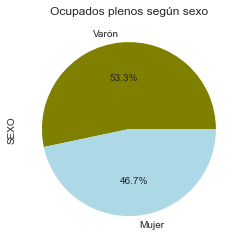

In [38]:
#Intensidad de la ocupación según sexo
sexoo = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Ocupado pleno"].SEXO.value_counts()
sexooplt = sexoo.plot.pie(colors= ["olive","lightblue"], autopct='%1.1f%%', title = "Ocupados plenos según sexo")

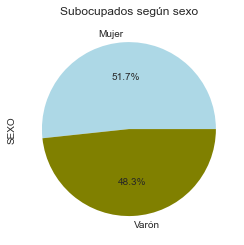

In [12]:
sexos = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Subocupado"].SEXO.value_counts()
sexosplt = sexos.plot.pie(colors= ["lightblue", "olive"], x= "labels", y= "values", autopct='%1.1f%%', title = "Subocupados según sexo")


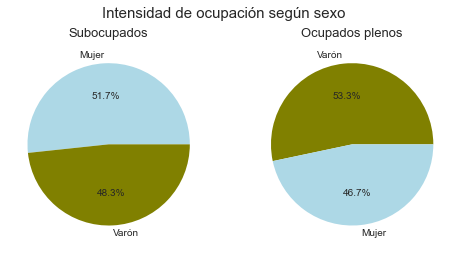

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

labels1= ["Mujer", "Varón"]
labels2= ["Varón", "Mujer"]

fig.suptitle('Intensidad de ocupación según sexo', fontsize=15)
ax1.pie(sexos, colors= ["lightblue", "olive",], autopct='%1.1f%%', labels= labels1)
ax1.set_title('Subocupados', fontsize=13)
ax2.pie(sexoo, colors= ["olive","lightblue"], autopct='%1.1f%%', labels= labels2)
ax2.set_title('Ocupados plenos', fontsize=13);


In [52]:
#Intensidad de la ocupación según nivel educativo
print(ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Subocupado"].NIVEL_EDUCATIVO.value_counts(normalize= True))

Secundario completo                  0.268244
Secundario incompleto                0.239054
Primario completo                    0.162557
Superior universitario incompleto    0.147458
Superior universitario completo      0.132864
Primario incompleto                  0.043785
Sin instrucción                      0.006039
Name: NIVEL_EDUCATIVO, dtype: float64


In [53]:
print(ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Ocupado pleno"].NIVEL_EDUCATIVO.value_counts(normalize=True))

Secundario completo                  0.296741
Superior universitario completo      0.236157
Secundario incompleto                0.164910
Superior universitario incompleto    0.147825
Primario completo                    0.122259
Primario incompleto                  0.028353
Sin instrucción                      0.003756
Name: NIVEL_EDUCATIVO, dtype: float64


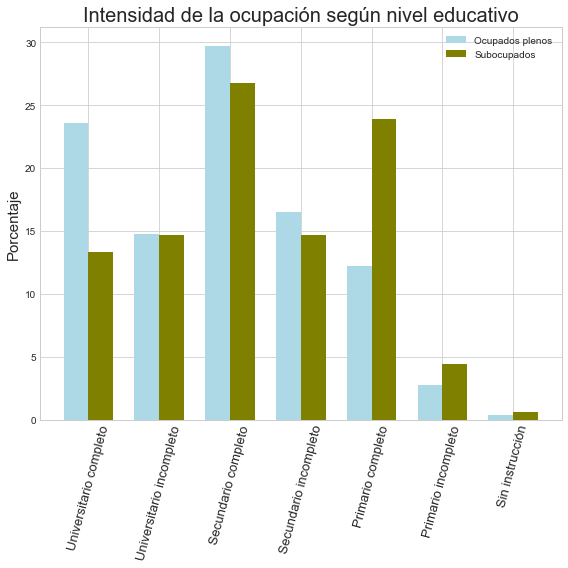

In [64]:
#Cuadro comparando nivel educativo entre subocupados y ocupados plenos en porcentajes.
labels = ['Universitario completo', 'Universitario incompleto', 'Secundario completo', 'Secundario incompleto', 'Primario completo', "Primario incompleto", "Sin instrucción"]
ocupadop = [23.6, 14.8, 29.7, 16.5, 12.2, 2.8, 0.4]
subo= [13.3, 14.7, 26.8, 14.7, 23.9, 4.4, 0.6]

x = np.arange(len(labels))  
width = 0.35  


fig, ax = plt.subplots(figsize=(8,8))
rects1 = ax.bar(x - width/2, ocupadop, width, label='Ocupados plenos', color="lightblue")
rects2 = ax.bar(x + width/2, subo, width, label='Subocupados', color="olive")

ax.set_ylabel('Porcentaje', fontsize=15)
ax.set_title('Intensidad de la ocupación según nivel educativo', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=13)
ax.legend()

plt.xticks(rotation=75)
fig.tight_layout()

plt.show()

In [ ]:
#Intensidad de la educación según edad

In [133]:
subocupados = ocupados.loc[ocupados['INTENSIDAD_DE_LA_OCUPACIÓN'].isin(['Subocupado'])]  
ocupados_plenos = ocupados.loc[ocupados['INTENSIDAD_DE_LA_OCUPACIÓN'].isin(['Ocupado pleno'])]  
sub_años =subocupados.groupby('AÑOS')['CODUSU'].count()
subaños = sub_años.reset_index()
oc_años =ocupados_plenos.groupby('AÑOS')['CODUSU'].count()
ocaños = oc_años.reset_index()


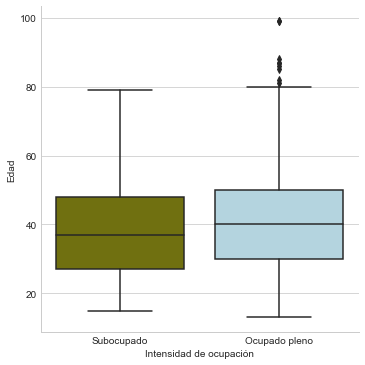

In [80]:
#Intensidad de la educación según edad
my_pal = {"Subocupado": "olive", "Ocupado pleno": "lightblue"}
plt = sns.catplot(x="INTENSIDAD_DE_LA_OCUPACIÓN", y="AÑOS", kind="box", palette=my_pal, data=ocupados)
plt.set(xlabel = "Intensidad de ocupación", ylabel = "Edad");
#quiero que se vean mas valores eje y

In [152]:
añosSUB = subocupados.groupby(["AÑOS", "INTENSIDAD_DE_LA_OCUPACIÓN"])["CODUSU"].count()
añosOC = ocupados_plenos.groupby(["AÑOS", "INTENSIDAD_DE_LA_OCUPACIÓN"])["CODUSU"].count()
print(añosSUB)

AÑOS  INTENSIDAD_DE_LA_OCUPACIÓN
15    Subocupado                     1
16    Subocupado                     6
17    Subocupado                     9
18    Subocupado                    14
19    Subocupado                    38
                                    ..
72    Subocupado                     4
73    Subocupado                     1
74    Subocupado                     2
75    Subocupado                     2
79    Subocupado                     1
Name: CODUSU, Length: 62, dtype: int64


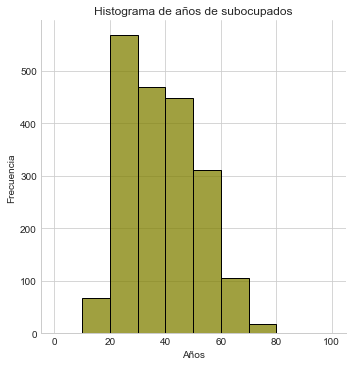

In [178]:
intervalos = range(0, 110, 10)

pltsub = sns.displot(subocupados.AÑOS, bins=intervalos, color= "olive")
pltsub.set(xlabel = "Años", ylabel = "Frecuencia", title = "Histograma de años de subocupados");

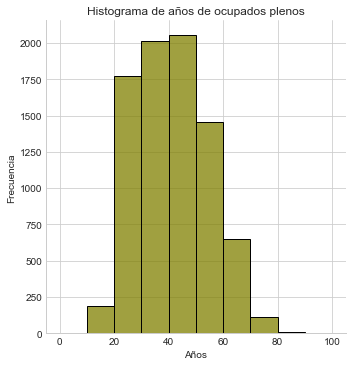

In [182]:
intervalos = range(0, 110, 10)

pltoc= sns.displot(ocupados_plenos.AÑOS, bins=intervalos, color= "olive")
pltoc.set(xlabel = "Años", ylabel = "Frecuencia", title = "Histograma de años de ocupados plenos");

In [13]:
#Intensidad según ingreso
ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Subocupado"].MONTO_DE_INGRESO_TOTAL.describe()

count      1987.000000
mean      18363.250629
std       16531.887237
min           0.000000
25%        8000.000000
50%       15000.000000
75%       24000.000000
max      153000.000000
Name: MONTO_DE_INGRESO_TOTAL, dtype: float64

In [14]:
ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Ocupado pleno"].MONTO_DE_INGRESO_TOTAL.describe()

count      8253.000000
mean      41191.175330
std       36680.472044
min           0.000000
25%       19170.000000
50%       32000.000000
75%       52000.000000
max      750000.000000
Name: MONTO_DE_INGRESO_TOTAL, dtype: float64

In [15]:
#Creación de una t
def calcula_indice(ingresos):
    if ingresos < 8312:
        return "Personas por debajo de la línea de indigencia"
    elif ingresos < 19700: 
        return "Personas por debajo de la línea de pobreza"
    else:
        return "Personas por sobre la línea de pobreza"
        
ocupados['SITUACION'] = ocupados.apply(lambda x: calcula_indice(x['MONTO_DE_INGRESO_TOTAL']),axis=1)

In [16]:
sub = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Subocupado"]
subin = sub.groupby(["MONTO_DE_INGRESO_TOTAL", "SITUACION"])["CODUSU"].count()
subing = subin.reset_index()
print(subing)

     MONTO_DE_INGRESO_TOTAL                                      SITUACION  \
0                         0  Personas por debajo de la línea de indigencia   
1                       200  Personas por debajo de la línea de indigencia   
2                       700  Personas por debajo de la línea de indigencia   
3                       900  Personas por debajo de la línea de indigencia   
4                      1000  Personas por debajo de la línea de indigencia   
..                      ...                                            ...   
300                  109900         Personas por sobre la línea de pobreza   
301                  110000         Personas por sobre la línea de pobreza   
302                  135000         Personas por sobre la línea de pobreza   
303                  150000         Personas por sobre la línea de pobreza   
304                  153000         Personas por sobre la línea de pobreza   

     CODUSU  
0        68  
1         1  
2         2  
3      

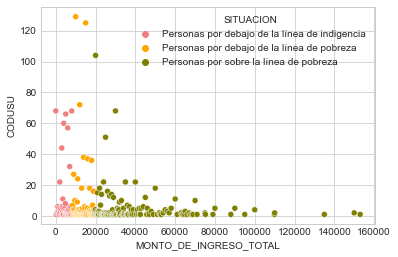

In [17]:
sns.scatterplot(x="MONTO_DE_INGRESO_TOTAL", y="CODUSU", hue="SITUACION", data= subing, palette = ["lightcoral", "orange", "olive" ]);


In [18]:
ocupadosplenos = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Ocupado pleno"]
ocin = ocupadosplenos.groupby(["MONTO_DE_INGRESO_TOTAL", "SITUACION"])["CODUSU"].count()
ocing = ocin.reset_index()


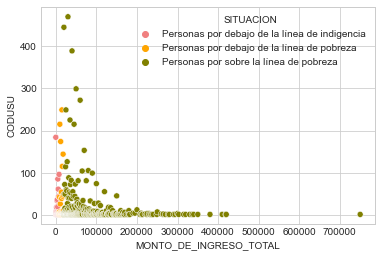

In [19]:
sns.scatterplot(x="MONTO_DE_INGRESO_TOTAL", y="CODUSU", hue="SITUACION", data= ocing, palette = ["lightcoral", "orange", "olive" ]);



In [20]:
#Eliminé outliers para poder comparar mejor
ocout = ocing.drop(ocing[ocing.MONTO_DE_INGRESO_TOTAL > 600000 ].index)
ocout.MONTO_DE_INGRESO_TOTAL.describe()

count       608.000000
mean      60919.447368
std       69292.497020
min           0.000000
25%       18845.000000
50%       35550.000000
75%       76325.000000
max      420000.000000
Name: MONTO_DE_INGRESO_TOTAL, dtype: float64

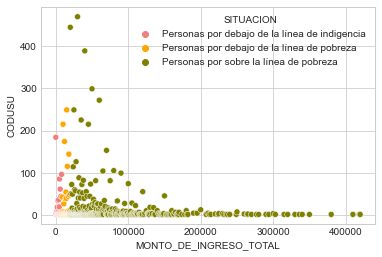

In [21]:
sns.scatterplot(x="MONTO_DE_INGRESO_TOTAL", y="CODUSU", hue="SITUACION", data= ocout, palette = ["lightcoral", "orange", "olive" ]);

In [22]:
#Según ingreso familiar total
def calcula_pobreza(ingresos):
    if ingresos < 25685:
        return "Hogares por debajo de la línea de indigencia"
    elif ingresos < 60874: 
        return "Hogares por debajo de la línea de pobreza"
    else:
        return "Hogares por sobre la línea de pobreza"
        
ocupados['FAMILIA'] = ocupados.apply(lambda x: calcula_pobreza(x['INGRESO_TOTAL_FAMILIAR']),axis=1)


In [23]:
ocpleno = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Ocupado pleno"]
familiapleno = ocpleno.groupby(["INGRESO_TOTAL_FAMILIAR", "FAMILIA"])["CODUSU"].count()
familiaplenoin = familiapleno.reset_index()

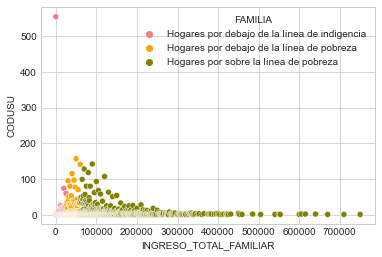

In [24]:
sns.scatterplot(x="INGRESO_TOTAL_FAMILIAR", y="CODUSU", hue="FAMILIA", data= familiaplenoin, palette = ["lightcoral", "orange", "olive" ]);

In [25]:
subem = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Subocupado"]
familiasubo = subem.groupby(["INGRESO_TOTAL_FAMILIAR", "FAMILIA"])["CODUSU"].count()
familiasub = familiasubo.reset_index()

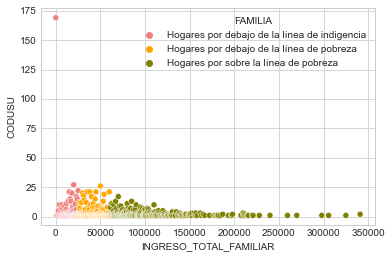

In [26]:
sns.scatterplot(x="INGRESO_TOTAL_FAMILIAR", y="CODUSU", hue="FAMILIA", data= familiasub, palette = ["lightcoral", "orange", "olive" ]);

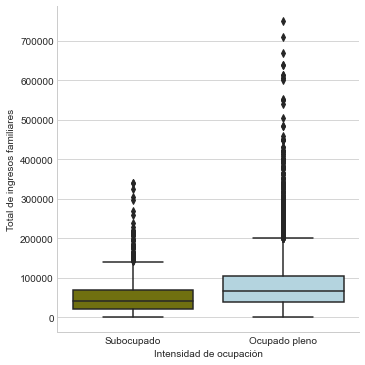

In [135]:
my_pal = {"Subocupado": "olive", "Ocupado pleno": "lightblue"}
plt = sns.catplot(x="INTENSIDAD_DE_LA_OCUPACIÓN", y="INGRESO_TOTAL_FAMILIAR", kind="box", palette=my_pal, data=ocupados)
plt.set(xlabel = "Intensidad de ocupación", ylabel = "Total de ingresos familiares");

In [139]:
sinout = ocupados.drop(ocupados[ocupados.INGRESO_TOTAL_FAMILIAR > 600000 ].index)


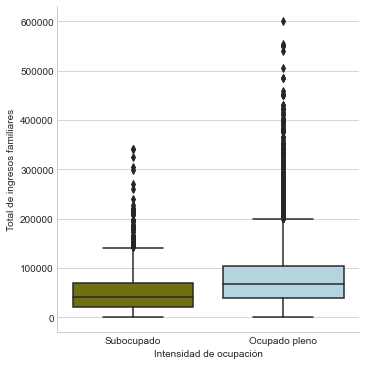

In [140]:
my_pal = {"Subocupado": "olive", "Ocupado pleno": "lightblue"}
plt = sns.catplot(x="INTENSIDAD_DE_LA_OCUPACIÓN", y="INGRESO_TOTAL_FAMILIAR", kind="box", palette=my_pal, data=sinout)
plt.set(xlabel = "Intensidad de ocupación", ylabel = "Total de ingresos familiares");

In [27]:
#Intensidad de la ocupación según si recibe o no aportes jubilatorios 
aportesoc = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Ocupado pleno"].DESCUENTO_POR_JUBILACIÓN.value_counts()
aportessub = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Subocupado"].DESCUENTO_POR_JUBILACIÓN.value_counts()
print(aportesoc)
print(aportessub)

Sí                                          4102
No                                          2204
No le corresponde la secuencia analizada    1947
Name: DESCUENTO_POR_JUBILACIÓN, dtype: int64
No                                          873
No le corresponde la secuencia analizada    840
Sí                                          274
Name: DESCUENTO_POR_JUBILACIÓN, dtype: int64


In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Intensidad de ocupación según descuento de aportes jubilatorios')
ax1.plot(aportesoc, kind= "pie", colors= ["lightblue", "olive", "silver"], autopct='%1.1f%%')
ax2.plot(aportessub, kind= "pie", colors= ["olive","silver", "lightblue"], autopct='%1.1f%%');


AttributeError: 'FacetGrid' object has no attribute 'subplots'

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Dos gráficos en una misma imagen')
ax1.pie(aportesoc, colors= ["lightblue", "olive", "silver"], autopct='%1.1f%%')
ax2.pie(aportessub, colors= ["olive","silver", "lightblue"], autopct='%1.1f%%');


AttributeError: 'FacetGrid' object has no attribute 'subplots'

<AxesSubplot:ylabel='DESCUENTO_POR_JUBILACIÓN'>

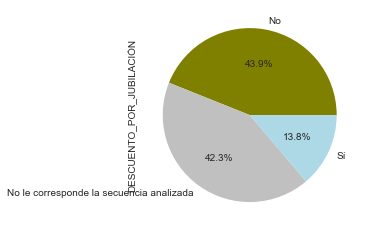

In [50]:
aportessub.plot.pie(colors= ["olive","silver", "lightblue"], autopct='%1.1f%%')

<AxesSubplot:ylabel='DESCUENTO_POR_JUBILACIÓN'>

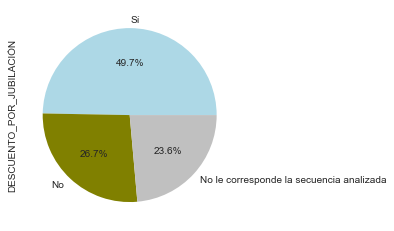

In [52]:
aportesoc.plot.pie (colors= ["lightblue", "olive", "silver"], autopct='%1.1f%%')

In [59]:
#CATEGORÍA OCUPACIONAL
sub_por = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Subocupado"].CATEGORÍA_OCUPACIONAL.value_counts(normalize= True)
ocu_por = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Ocupado pleno"].CATEGORÍA_OCUPACIONAL.value_counts(normalize= True)
print(ocu_por)
print(sub_por)

Obrero o empleado                       0.764086
Cuenta propia                           0.197625
Patrón                                  0.027869
Trabajador familiar sin remuneración    0.010420
Name: CATEGORÍA_OCUPACIONAL, dtype: float64
Obrero o empleado                       0.577252
Cuenta propia                           0.406140
Patrón                                  0.008556
Trabajador familiar sin remuneración    0.008052
Name: CATEGORÍA_OCUPACIONAL, dtype: float64


In [48]:
#Intensidad de ocupación según categoría de ocupación
labels = [ 'Subocupados', 'Ocupados plenos']


ax = sns.catplot(x=sub_por, ocu_por, y=CATEGORÍA_OCUPACIONAL kind= 'count', height=5, aspect=2, color='olive', data= sub_por, ocu_por);

ax.set(xticks=range(2), xticklabels=labels)

plt.xlabel("Estado del paciente")
plt.ylabel("Cantidad de pacientes")
plt.title("Distribución de la edad por estado del paciente");

SyntaxError: invalid syntax (<ipython-input-48-11b82b7bed28>, line 5)

In [57]:
ocupación_cat = ocupados.groupby(["INTENSIDAD_DE_LA_OCUPACIÓN", "CATEGORÍA_OCUPACIONAL"])["CODUSU"].count()
print(ocupación_cat)

INTENSIDAD_DE_LA_OCUPACIÓN  CATEGORÍA_OCUPACIONAL               
Ocupado pleno               Cuenta propia                           1631
                            Obrero o empleado                       6306
                            Patrón                                   230
                            Trabajador familiar sin remuneración      86
Subocupado                  Cuenta propia                            807
                            Obrero o empleado                       1147
                            Patrón                                    17
                            Trabajador familiar sin remuneración      16
Name: CODUSU, dtype: int64


# 5 Conclusiones, qué estaba buscando, qué encontré

# 6 Referencias
links a recursos que utilizamos y que nos sirvieron para análisis
https://www.indec.gob.ar/uploads/informesdeprensa/canasta_04_21EDC756AEAE.pdf
https://twitter.com/INDECArgentina/status/1385308275881746433/photo/1